<a href="https://colab.research.google.com/github/colber94/CS230_FinalProject/blob/master/UNET_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/jakeret/unet.git
!pip install rasterio
!pip install geopandas
!pip install earthpy

  Cloning https://github.com/jakeret/unet.git to /tmp/pip-req-build-tjrhi_zv
  Running command git clone -q https://github.com/jakeret/unet.git /tmp/pip-req-build-tjrhi_zv
  Created wheel for unet: filename=unet-0.0.post0.dev60+g8d84dcf-py2.py3-none-any.whl size=25275 sha256=4e14f249581adc14dda969f4b11c884666ebbde89b2f678f465506834693eaca
  Stored in directory: /tmp/pip-ephem-wheel-cache-tthk0o3s/wheels/f5/38/c8/8f0a157cfd7616cc1a24811a52b9a669c0ee8fccc9f99d3cbc
Successfully built unet
     |████████████████████████████████| 18.2MB 214kB/s 
     |████████████████████████████████| 931kB 3.5MB/s 
     |████████████████████████████████| 10.9MB 26kB/s 
     |████████████████████████████████| 14.7MB 320kB/s 
     |████████████████████████████████| 1.4MB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for earthpy: filename=earthpy-0.9.1-cp36-none-any.whl size=1365034 sha256=a2e38164b269a62f

In [65]:
!pip install pillow 

In [0]:

import tensorflow as tf
import unet
from unet.datasets import circles
import numpy as np
from PIL import Image



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

import rasterio
import geopandas as gpd
import rasterio as rio
import rasterio.plot as rioplot
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

Truth = files.upload()


Saving T10SGE_composite.npz to T10SGE_composite.npz
Saving T10SGF_composite.npz to T10SGF_composite.npz
Saving T10SGH_composite.npz to T10SGH_composite.npz
Saving T10TDK_composite.npz to T10TDK_composite.npz


In [6]:
from google.colab import files

Test = files.upload()



Saving T10SGE_composite.tif to T10SGE_composite.tif
Saving T10SGF_composite.tif to T10SGF_composite.tif
Saving T10SGH_composite.tif to T10SGH_composite.tif
Saving T10TDK_composite.tif to T10TDK_composite.tif


In [21]:
Test['T10SGE_composite.tif'].shape()

AttributeError: ignored

In [0]:
# iterate through the dictionary and create training and test data 

def truth_data (npzFiles, percentTrain):
 
  # Create the split for train and test data 
  numTrain = round(len(npzFiles)*percentTrain*.01)
  numTest = len(npzFiles) - numTrain
  trainingData = []
  testingData = []
  i = 0
  #iterate through the uploaded files and pull out the rasterized images 

  for name in npzFiles:
    image = np.load(name,allow_pickle=True)
    data = image['arr_0'][0]

    #Add them to the training or test data sets accordingly 
    if i < numTrain:
      trainingData.append(data)
    else:
      testingData.append(data)

    i+=1

  trainingData = np.array(trainingData)
  testingData = np.array(testingData)

  return trainingData, testingData 

      

def test_data(files, percentTrain):
  numTrain = round(len(files)*percentTrain*.01)
  numTest = len(files) - numTrain
  trainingData = []
  testingData = []
  i = 0
  #iterate through the uploaded files and pull out the rasterized images 

  for name in files:
    data = rio.open(name).read()
    data = data.transpose([1,2,0])
    #Add them to the training or test data sets accordingly 
    if i < numTrain:
      trainingData.append(data)
    else:
      testingData.append(data)

    i+=1

  trainingData = np.array(trainingData)
  testingData = np.array(testingData)

  return trainingData, testingData 




In [0]:
# Open the rasterized dataset and create dataset

TrainingTruth, TestingTruth = truth_data(Truth,80) #This is the 4GLTE from FCC
TrainingData, TestingData = test_data(Test,80) #This is the raw sat TIF images 

In [72]:
TrainingData[0].resize(256,256)

ValueError: ignored

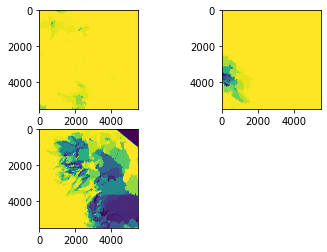

In [25]:
## Check out the ground truth images in the set 
for i in range(TrainingTruth.shape[0]):
  pp.subplot(2,2,i+1)
  pp.imshow(TrainingTruth[i])

AttributeError: ignored

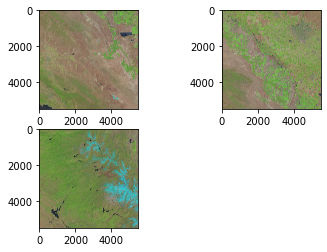

In [62]:
# Check out the testing images in the set 
for i in range(TrainingData.shape[0]):
  pp.subplot(2,2,i+1)
  pp.imshow(TrainingData[i])

In [0]:
#building the model
unet_model = unet.build_model(channels=1,
                          num_classes=1,
                          layer_depth=3,
                          filters_root=16)

unet.finalize_model(unet_model)


In [64]:
#training and validating the model
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            TrainingData,
            TrainingTruth,
            epochs=5,
            batch_size=1)  

TypeError: ignored